<a href="https://colab.research.google.com/github/Fameless4ellL/GoogleCollabML/blob/main/comparing_activation_function_ReLU_vs_Swish_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q keras

In [ ]:
!pip install livelossplot

In [ ]:
from numpy import exp,log,tanh,linspace,sin,float_power
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set_style('whitegrid')

In [ ]:
def relu(x):
    return max(0,x)
def sigmoid(x):
    sg = 1/(1+exp(-x))
    return sg
def swish(x):
    return x*sigmoid(x)
    

In [ ]:
x = linspace(-10,10,10000)
y1 = sigmoid(x)
y2 = [relu(i) for i in x]
y5 = swish(x)

<h1>Plotting  Activation function</h1>

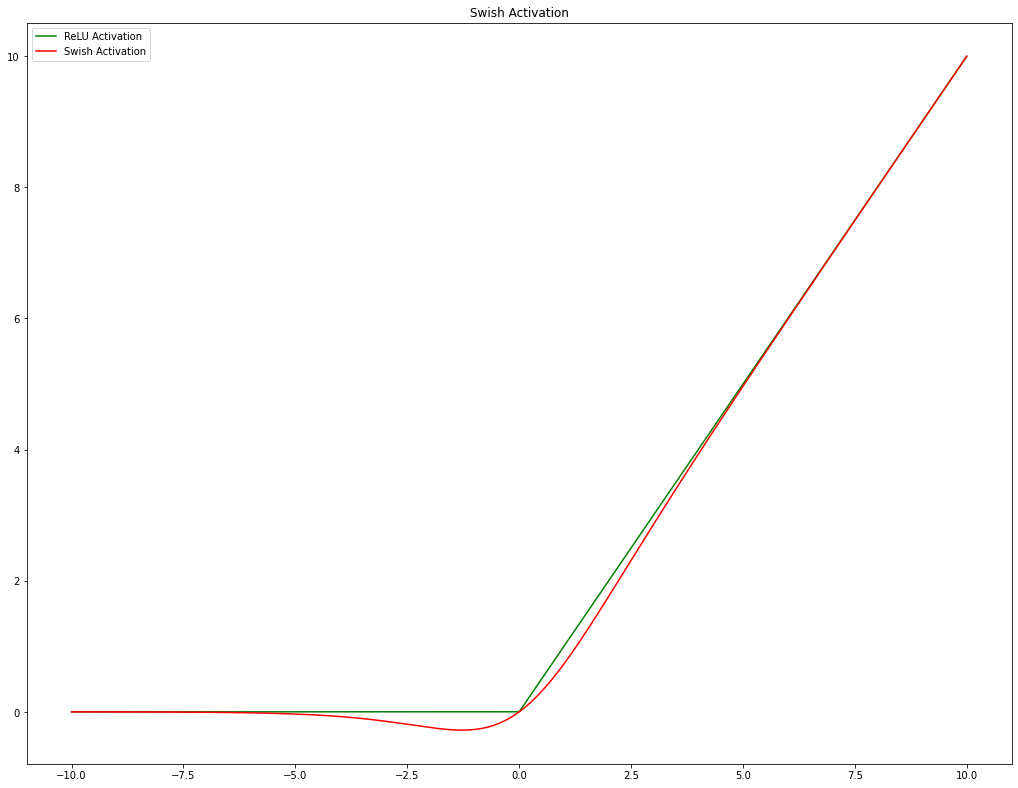

In [ ]:
plt.figure(1,figsize=(60,30))
plt.subplot(233)
sns.lineplot(x=x,y=y2,color='green',label='ReLU Activation')
plt.title('ReLU Activation')
sns.lineplot(x=x,y=y5,color='red',label='Swish Activation')
plt.title('Swish Activation')
plt.savefig('act.png')
plt.show()

## Comparing Time of each activation function per 100k loops

In [ ]:
%%timeit
relu(0.9343)

The slowest run took 25.41 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 207 ns per loop


In [ ]:
%%timeit
swish(0.9343)

The slowest run took 25.40 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 1.75 µs per loop


In [ ]:
%%timeit
sigmoid(0.9343)

The slowest run took 22.69 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 1.52 µs per loop


In [ ]:
m = float_power(10,-6)
n = float_power(10,-9)
a1 = [168*n,1.45*m]
b1 = ['ReLU','Swish']
s = ['233 ns ','2.43 µs ']

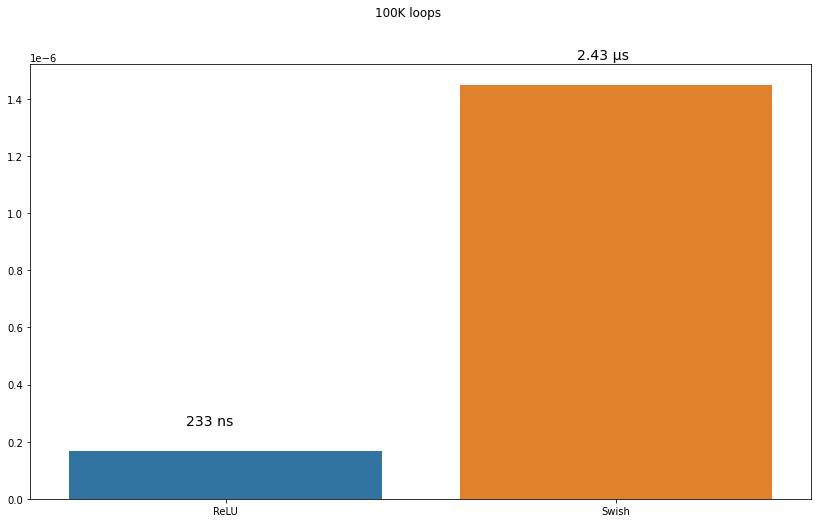

In [ ]:
plt.figure(1,figsize=(14,8))
sns.barplot(y=a1,x=b1)
plt.suptitle("100K loops");
for i in range(2):
  plt.text(x =i-0.1 , y = a1[i]+0.00000009, s =s[i], size = 14)
plt.show()

# Build a model

In [ ]:
import cv2
from tqdm import tqdm_notebook as tqdm
import io
import pandas as pd
import numpy as np

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras. layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras import regularizers

import tensorflow  as tf
from keras.layers import *
from keras.callbacks import ReduceLROnPlateau

import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
!unzip '/content/train.zip' -d '/content/mnist/'

unzip:  cannot find or open /content/train.zip, /content/train.zip.zip or /content/train.zip.ZIP.


In [ ]:
from fastai.vision import *

In [ ]:
label = pd.read_csv('/content/mnist_label.csv')
label.head()

FileNotFoundError: ignored

In [ ]:
plt.figure(1,figsize=(16,6))
sns.countplot(x=label.digit)
plt.title('Count of images of each digit')
plt.ylim(1600,2300);

NameError: ignored

<Figure size 1152x432 with 0 Axes>

In [ ]:
path = Path('/content/')

In [ ]:
stats = ([0.8693],[0.3082])
data = (ImageList.from_df(label,path=path,folder='mnist',suffix='.png',cols='image_id')
                .split_by_rand_pct(0.2,seed=64)
                .label_from_df(cols='digit')
                .transform( size=28, padding_mode='zeros')
                .databunch(bs=128)).normalize(stats)

NameError: ignored

In [ ]:
data.show_batch(rows=3,figsize=(20,6))

NameError: ignored

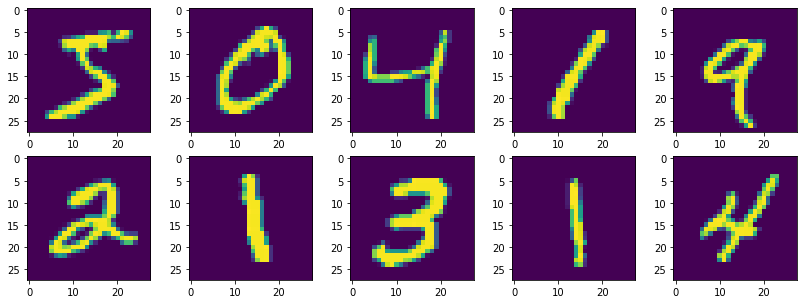

In [ ]:
plt.figure(figsize=(14,5))
x, y = 5, 2 
for i in range(10):  
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i])
plt.show()

In [ ]:
batch_size = 128 # Batch-Size
num_classes = 10 # Number of Class
epochs = 20 # Number of epoch
w_l2 = 1e-4 # Initial

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5)

In [ ]:
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors into binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Model with ReLU activation function

In [ ]:
modelRelu = Sequential()
modelRelu.add(Conv2D(32, kernel_size=(3, 3),  kernel_regularizer=regularizers.l2(w_l2),
                 input_shape=input_shape))
modelRelu.add(BatchNormalization())
modelRelu.add(Activation('relu'))
modelRelu.add(Conv2D(64, (3, 3),  kernel_regularizer=regularizers.l2(w_l2)))
modelRelu.add(BatchNormalization())
modelRelu.add(Activation('relu'))
modelRelu.add(MaxPooling2D(pool_size=(2, 2)))
modelRelu.add(Dropout(0.25))
modelRelu.add(Flatten())
modelRelu.add(Dense(128, kernel_regularizer=regularizers.l2(w_l2)))
modelRelu.add(BatchNormalization())
modelRelu.add(Activation('relu'))
modelRelu.add(Dropout(0.5))
modelRelu.add(Dense(num_classes, activation='softmax'))

modelRelu.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
modelRelu.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_11 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
activation_11 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_12 (Batc (None, 24, 24, 64)        256       
_________________________________________________________________
activation_12 (Activation)   (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)       

In [ ]:
# raw keras
from livelossplot import PlotLossesKeras

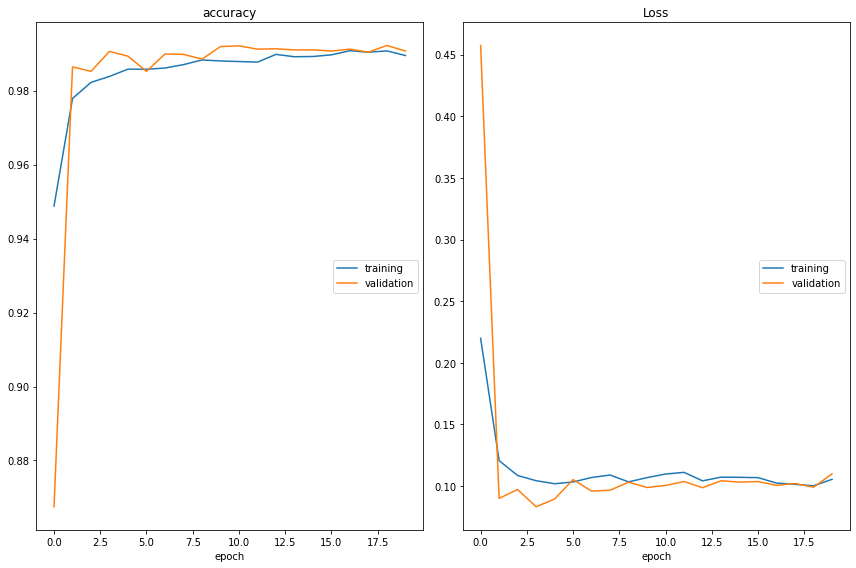

accuracy
	training         	 (min:    0.949, max:    0.991, cur:    0.989)
	validation       	 (min:    0.868, max:    0.992, cur:    0.991)
Loss
	training         	 (min:    0.100, max:    0.220, cur:    0.105)
	validation       	 (min:    0.083, max:    0.457, cur:    0.110)
Test loss: 0.10987716168165207
Test accuracy: 0.9907000064849854


In [ ]:
plotlosses = PlotLossesKeras()

hist_relu = modelRelu.fit(x_train, y_train, 
                    epochs=epochs, batch_size=batch_size,
                    verbose=1,
                    validation_data=(x_test, y_test), callbacks=[plotlosses])
score = modelRelu.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

## Model with Swish activation function

In [ ]:
def swish(x):
    return x * K.sigmoid(x)
    # return x * (1/(1 + K.exp(-x)))

In [ ]:
modelSwish = Sequential()
modelSwish.add(Conv2D(32, kernel_size=(3, 3), kernel_regularizer=regularizers.l2(w_l2),
                 input_shape=input_shape, kernel_initializer='he_normal'))
modelSwish.add(BatchNormalization())
modelSwish.add(Activation(swish))
modelSwish.add(Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(w_l2), kernel_initializer='he_normal'))
modelSwish.add(BatchNormalization())
modelSwish.add(Activation(swish))
modelSwish.add(MaxPooling2D(pool_size=(2, 2)))
modelSwish.add(Dropout(0.25))
modelSwish.add(Flatten())
modelSwish.add(Dense(128, kernel_regularizer=regularizers.l2(w_l2), kernel_initializer='he_normal'))
modelSwish.add(BatchNormalization())
modelSwish.add(Activation(swish))
modelSwish.add(Dropout(0.5))
modelSwish.add(Dense(num_classes, activation='softmax'))

modelSwish.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

modelSwish.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_14 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
activation_14 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_15 (Batc (None, 24, 24, 64)        256       
_________________________________________________________________
activation_15 (Activation)   (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)       

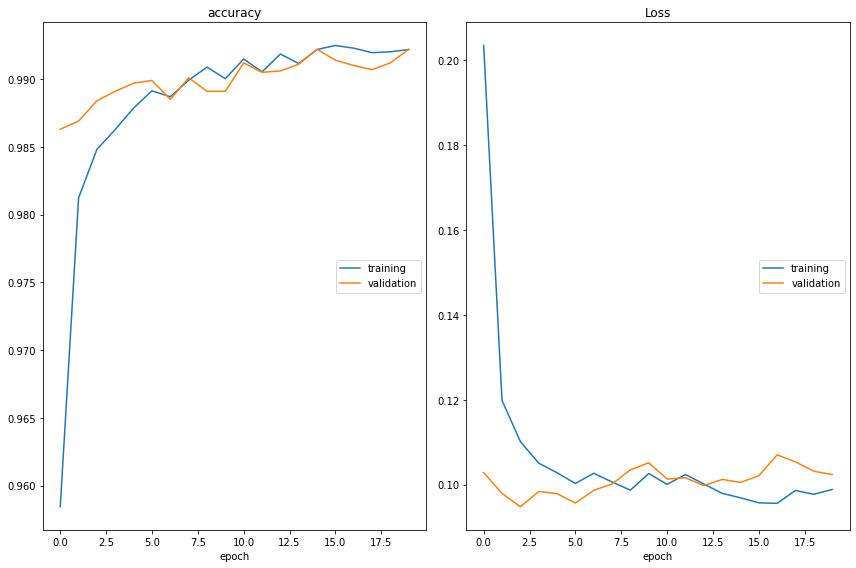

accuracy
	training         	 (min:    0.958, max:    0.992, cur:    0.992)
	validation       	 (min:    0.986, max:    0.992, cur:    0.992)
Loss
	training         	 (min:    0.096, max:    0.203, cur:    0.099)
	validation       	 (min:    0.095, max:    0.107, cur:    0.102)
Test loss: 0.1023758202791214
Test accuracy: 0.9922000169754028


In [ ]:
plotlosses1 = PlotLossesKeras()

hist_swish=modelSwish.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[plotlosses1])
score = modelSwish.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
!pip install torchviz

     |████████████████████████████████| 51kB 4.0MB/s 
  Created wheel for torchviz: filename=torchviz-0.0.1-cp36-none-any.whl size=3522 sha256=bdd1c3a9abd7216997f452400cac028d6f3d4a0fec73c5e843102154ac173db1
  Stored in directory: /root/.cache/pip/wheels/2a/c2/c5/b8b4d0f7992c735f6db5bfa3c5f354cf36502037ca2b585667
Successfully built torchviz


In [ ]:
from graphviz import Digraph
import torch
from torch.autograd import Variable
from torchviz import make_dot

Plotting model Parameters of Models with Mish and ReLU activation function

In [ ]:
x = Variable(torch.rand(8, 3,3,3))

In [ ]:
y = modelMish(x)

NameError: ignored

In [ ]:
make_dot(y.mean(),params=dict(modelRelu.named_parameters()))

In [ ]:
yR= modelRelu1(x)

In [ ]:
make_dot(yR.mean(),params=dict(modelRelu1.named_parameters()))

## Defining the plot function

In [ ]:
def plot_history(hists, attribute='val_loss', axis=(-1,21,0.85,0.94), loc='lower right'):
    ylabel = {'oss': 'loss', 'acc': 'accuracy'}
    title = {'val_loss': 'valid. loss', 'loss': 'trn. loss', 'val_accuracy': 'valid. accuracy', 'accuracy': 'trn. accuracy'}
    num_hists = len(hists)
    
    plt.figure(figsize=(12, 8))  
    plt.axis(axis)
    for i in range(num_hists):
        plt.plot(hists[i].history[attribute])
    plt.title(title[attribute])  
    plt.xlabel('epoch')  
    plt.legend(['ReLU', 'Swish'], loc=loc)  

    plt.show()

In [ ]:
hists = [hist_relu, hist_swish]

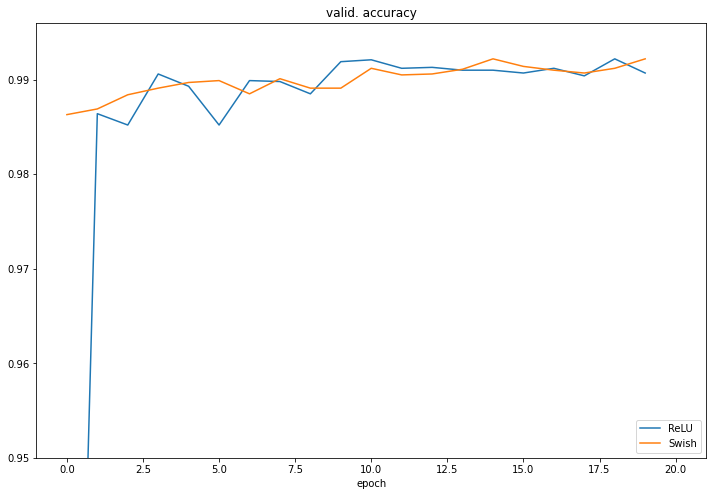

In [ ]:
plot_history(hists, attribute='val_accuracy',axis=(-1,21,0.95,0.9960), loc='lower right')

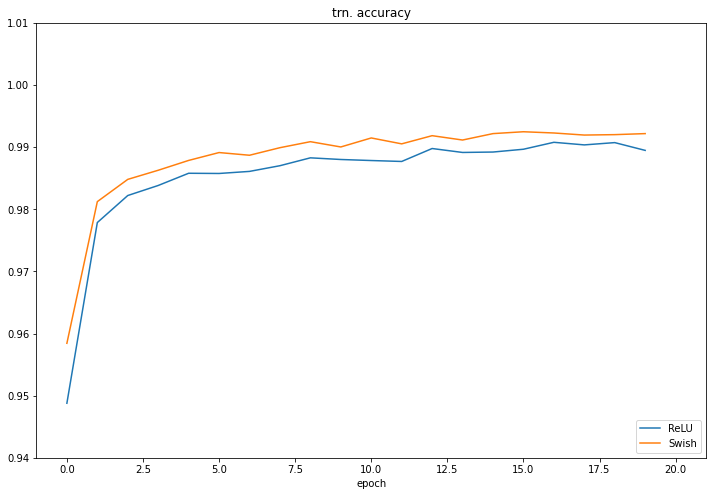

In [ ]:
plot_history(hists, attribute='accuracy', axis=(-1,21,0.94,1.01), loc='lower right')

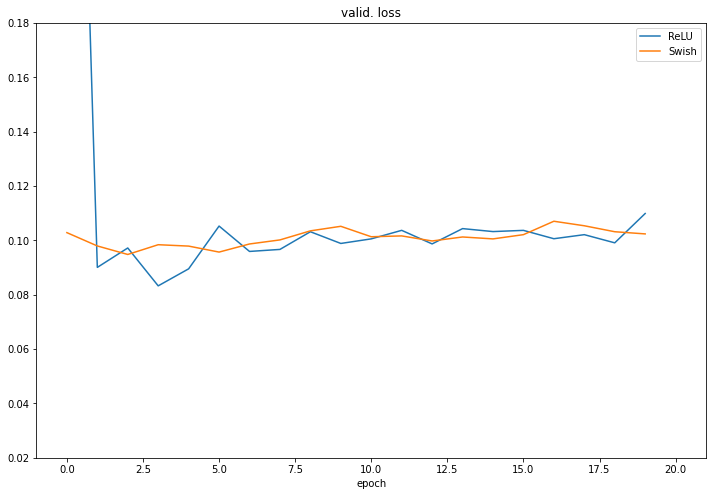

In [ ]:
plot_history(hists, attribute='val_loss', axis=(-1,21,0.02,0.18), loc='upper right')

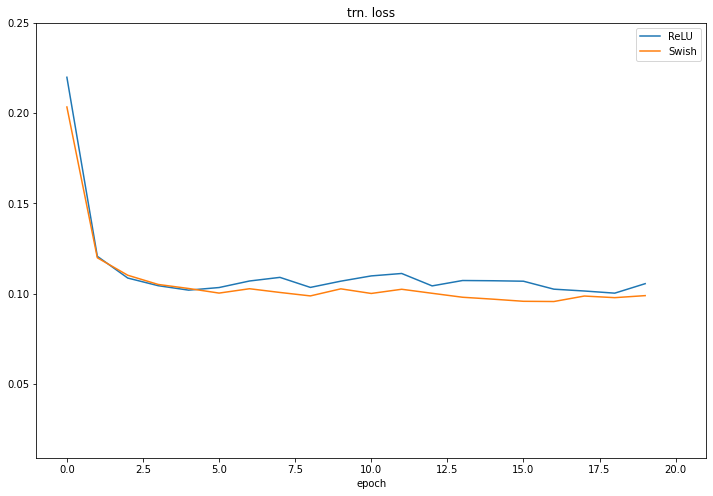

In [ ]:
plot_history(hists, attribute='loss', axis=(-1,21,0.009,0.25), loc='upper right')